# 実践演習2-2

ライブラリの読み込み

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

### 学習データ (breast cancer) の読み込みと概要の表示

In [3]:
bc = load_breast_cancer()
print(bc.DESCR)
X = bc.data
y = bc.target

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

### 前処理（主成分分析）

In [4]:
pca = PCA()
X2 = pca.fit_transform(X)

結果を散布図として表示

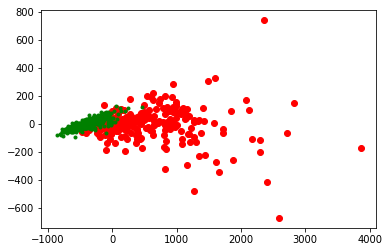

In [5]:
plt.plot(X2[y==0,0], X2[y==0,1],"ro")
plt.plot(X2[y==1,0], X2[y==1,1],"g.")

累積寄与率の表示

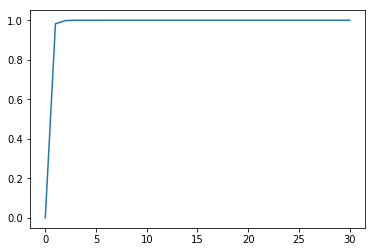

In [6]:
ev_ratio = pca.explained_variance_ratio_
ev_ratio = np.hstack([0,ev_ratio.cumsum()])
plt.plot(ev_ratio)

### 前処理 (標準化)

In [7]:
X_scaled = preprocessing.scale(X)

### 学習（k-NN法で識別を行う識別器の作成）

In [8]:
clf = KNeighborsClassifier(n_neighbors=1)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


学習（交差確認法による性能評価）

In [9]:
scores = cross_val_score(clf, X_scaled, y, cv=10)

正解率の平均と95%信頼区間の表示

In [10]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.95 (+/- 0.05)


学習（混同行列の表示）

In [11]:
y_pred = cross_val_predict(clf, X_scaled, y, cv=10)
print(confusion_matrix(y, y_pred))

[[197  15]
 [ 13 344]]
